# Hypothesis: Accessing an item from a list in python is O(1) operation 

In [1]:
# importing packages 

import datetime
import random
import time 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to have progress bars 
from tqdm.notebook import tqdm

## Part 1: accessing list items as the list-size increases

The time to access a random indexed item from a list does not depend on the size of the list 

### Roadmap/ Psudo-code:

for different size of lists:   
  -> access 1000 random indexes, do a smalll operation  
  -> record time taken for these 1000 accesses & plot it againt the list size

In [5]:
#empty dict to record the time taken
time_keeper_1 ={}

#min and max of the size of the list 
xmin = 1000
xmax = 200000

for x in tqdm(range(xmin, xmax,1000)):
    
    # generating a list of size n and shuffle it 
    my_list = [i for i in range(x)]
    random.shuffle(my_list) 
    time.sleep(0.1) #take a breather 
    
    # access 1000 random itmes from the list and do a small operation 
    starttime = datetime.datetime.now()
    for i in range(1000):
        index = random.randint(0,x-1)
        my_val = my_list[index]
        calc = my_val * 2 # small useless math operation
    endtime = datetime.datetime.now()
    time_taken = (endtime-starttime).total_seconds()
    
    # recording things in the dictionary
    time_keeper_1[x] = time_taken    

In [6]:
test_1_timetable = pd.DataFrame.from_dict(time_keeper_1, orient='index')
test_1_timetable['list_size'] = test_1_timetable.index

In [24]:
test_1_timetable.rename({0:"access_time"}, axis=1, inplace=True)
test_1_timetable.head(3)

,access_time,list_size
1000,0.001193,1000
2000,0.002308,2000
3000,0.003131,3000


Text(0.5, 1.0, 'Time (in sec) to access 1000 random values from a list')

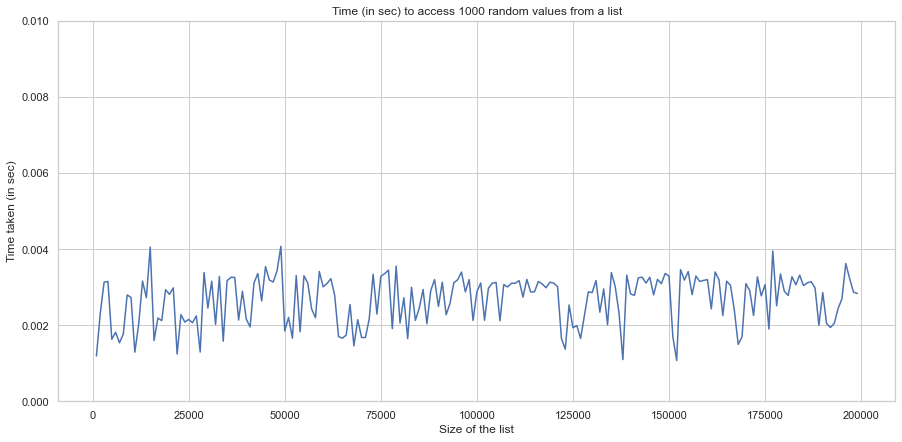

In [23]:
#sns.lineplot(x = test_1_timetable[''], y=test_1_timetable['access_time'])

plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
sns_plot  = sns.lineplot(x="list_size", y="access_time", data=test_1_timetable, palette="Blues_d")
sns_plot.set(xlabel="Size of the list", ylabel="Time taken (in sec)")
sns_plot.set(ylim=(0,0.01)) # to make the linear relationship a bit clearer 
sns_plot.set_title("Time (in sec) to access 1000 random values from a list")

### The line has some variation, but overall direction of line is straight as list size increases

## Part 2: lookup time for any random location in a huge list 

### A time to access a given item from a list does not vary by the index values, all indexes of the list takes ~similar amout of time to be accessed

### Roadmap: 
 - first to make huge list of random values
 - for 1000 times, pick a random index from the list and access the value stored in that index, and store the access tiem against the index value

In [28]:
# a list of 200,000 random values 
my_list = []
for i in range(200000):
        my_list.append(random.random())

        #take a breather 
time.sleep(0.5)

time_record_2 = {}

# access random item from the list 
for i in tqdm(range(1000)):
        index = random.randint(0,200000-1)
        starttime = datetime.datetime.now()
        val = my_list[index]
        calc = val *2 # small random operation
        endtime = datetime.datetime.now()
        diff = (endtime-starttime).total_seconds() *1000
        time_record_2[index] = diff
        
        

In [42]:
# preparing data frame for plotting 

test_2_timetable = pd.DataFrame.from_dict(time_record_2, orient="index")
test_2_timetable = test_2_timetable.reset_index()
test_2_timetable.rename(columns={0:'access_time', 'index':'index_num'}, inplace=True)
test_2_timetable.sort_values('index_num', inplace = True)

test_2_timetable.head(3)

,index_num,access_time
229,193,0.001
728,529,0.001
598,911,0.001


Text(0.5, 1.0, 'Time (in sec) to access 1000 random values from a list')

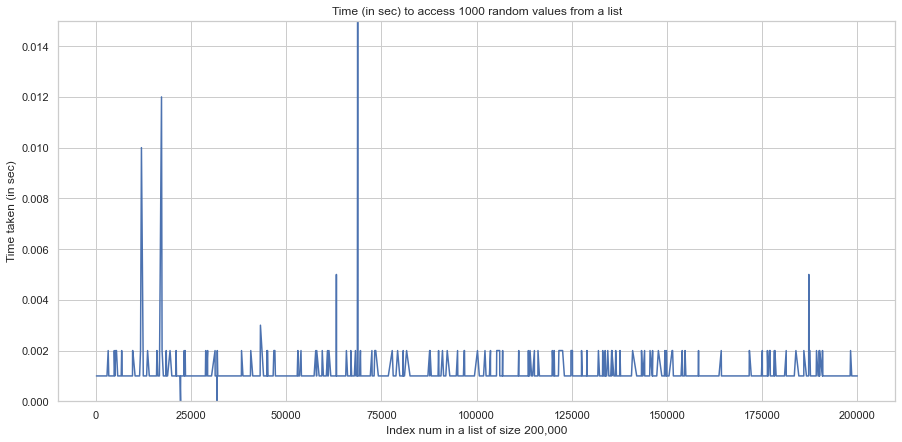

In [52]:
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
sns_plot  = sns.lineplot(x="index_num", y="access_time", data=test_2_timetable, palette="Blues_d")
sns_plot.set(xlabel="Index num in a list of size 200,000", ylabel="Time taken (in sec)")
sns_plot.set(ylim=(0.00,0.015)) # to make the linear relationship a bit clearer 
sns_plot.set_title("Time (in sec) to access 1000 random values from a list")

### As expected a linear relationship

#### So all indexes of a list take similar amount of time to be accessed.   


### Results are not a suprise, as Python list uses hash functions to access and store values with index
### Thus, lists are super useful data structures, even when they become really big. 

# /fin. 